In [1]:
!pip install -U numpy
!pip install -U scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 93.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.10 requires mkl, which is not installed.
hdijupyterutils 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.1 which is incompatible.
sagemaker 2.231.0 requires numpy<2.0,>=1.9.0, but you have numpy 2.1.1 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.4 MB/

In [216]:
from scipy.io import wavfile # get the api
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
from scipy.signal.windows import tukey
from scipy.signal  import decimate

import os

FFT_WINDOW_SECONDS = 1/4 # how many seconds of audio make up an FFT window
AUDIO_FILE = "content/ilovernr.wav" # The file thas is parsed
SAMPLING_FREQUENCY, data = wavfile.read(AUDIO_FILE) # load the sampling rate and the audio data
audio = data.T[0] # this is a two channel soundtrack, get the first track
#audio= audio
windowsize=int(SAMPLING_FREQUENCY*FFT_WINDOW_SECONDS) # The number of sample in the window (FFT uses this parameter to build the window)
AUDIO_LENGTH = len(audio)/SAMPLING_FREQUENCY
FPS=50 # Nombre de frame par seconde pour l'analyse
HOP= int(SAMPLING_FREQUENCY/FPS) #Avancement en echantillon pour cahqe 
audio=decimate(audio,5)
print("Max audio avant filtre",np.max(audio))
sos = signal.butter(2, 250, 'low', fs=SAMPLING_FREQUENCY, output='sos')
audio = signal.sosfilt(sos, audio)
print("Max audio après filtre",np.max(audio))
SAMPLING_FREQUENCY=SAMPLING_FREQUENCY//5

print("Frequence d'échantillonage",SAMPLING_FREQUENCY)
print("Nombre de sample",len(audio))

Max audio avant filtre 33377.01525978846
Max audio après filtre 12698.964438215677
Frequence d'échantillonage 9600
Nombre de sample 1680768


In [217]:
from scipy.fft import fft, fftfreq


AVGMEAN_WINDOWSIZE=SAMPLING_FREQUENCY//5
totfft=np.zeros(len(audio))
audio1=audio.astype(float)
audio1=audio1/np.max(audio1)
audio1=audio1*audio1
convolute=np.sqrt(np.convolve(audio1,np.ones(AVGMEAN_WINDOWSIZE)/AVGMEAN_WINDOWSIZE,mode='same'))


In [193]:
x=[i/SAMPLING_FREQUENCY for i in range(len(audio1))]

In [225]:
from scipy.fft import fft, fftfreq
WINDOWSIZEINNBSAMPLE=int(SAMPLING_FREQUENCY*15)
N=len(convolute)
print("Fenêtre d'échantillon",WINDOWSIZEINNBSAMPLE)
#AVGMEAN_WINDOWSIZE=100
begin=0
seveper=np.zeros((2,N//WINDOWSIZEINNBSAMPLE+1))

for i in range(WINDOWSIZEINNBSAMPLE,N,WINDOWSIZEINNBSAMPLE):
    sample=convolute[begin:i]
    y=np.percentile(sample,85)
    index=i//WINDOWSIZEINNBSAMPLE
    xi=(begin+i)/2/SAMPLING_FREQUENCY
    seveper[0,index]=xi
    seveper[1,index]=y
    begin=i
    #print(len(sample))
    





Fenêtre d'échantillon 144000


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

(30.0, 60.0)

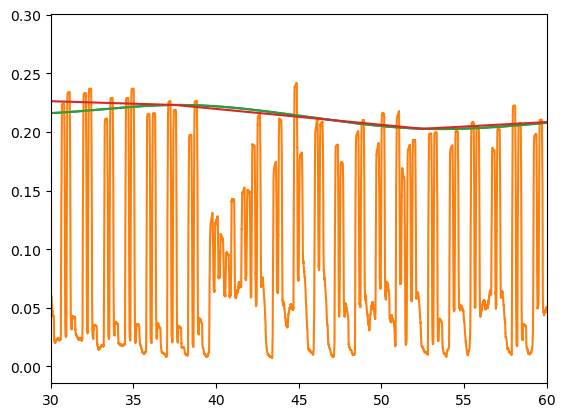

In [219]:



from scipy.interpolate import CubicSpline
spl = CubicSpline(seveper[0],seveper[1])
sply=spl(x)
plt.plot(x,sply)

plt.plot(x,convolute)
plt.plot(x,sply)
plt.plot(seveper[0],seveper[1])

plt.xlim(30,60)


In [220]:
convolute=convolute>sply

In [221]:
diffpatt=np.array([1,-1])
diff=np.convolve(convolute,diffpatt,mode="valid")


Nombre de points beat 129


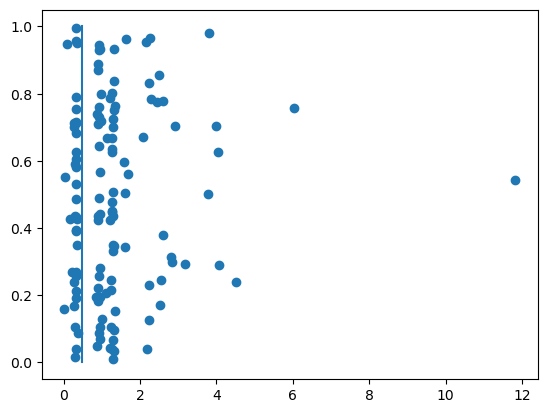

In [222]:
indexes=np.where(diff==1)
print("Nombre de points beat",len(indexes[0]))
diffsp=np.convolve(indexes[0],diffpatt,mode="valid")/SAMPLING_FREQUENCY

plt.scatter(diffsp,np.random.rand(len(diffsp)))
plt.plot([60/122,60/122],[0,1])

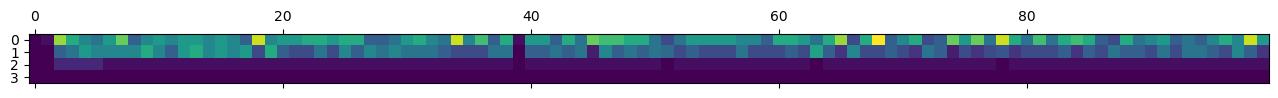

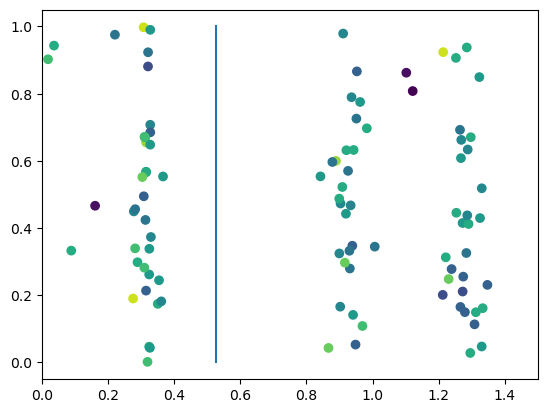

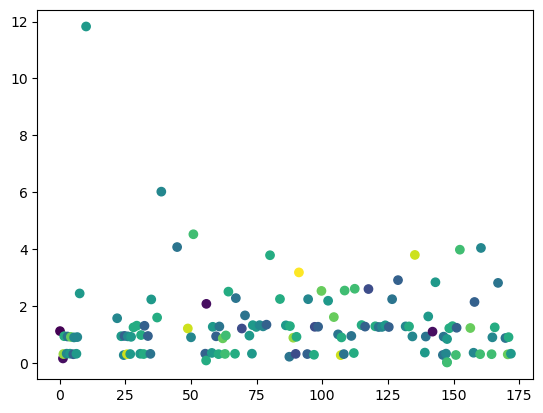

In [223]:
# from scipy.fft import fft, fftfreq
fftindexes=indexes[0]
WINDOWSIZE=SAMPLING_FREQUENCY//4

fftfreqs=fftfreq(WINDOWSIZE,1/SAMPLING_FREQUENCY)
binsfreq=[20,60,250,1500,4000]
listbins=[]
for i in binsfreq:
    mini=np.min(np.where(fftfreqs>i))
    listbins.append(mini)

index=0
analyze=np.zeros((5,len(fftindexes)))
for i in fftindexes:
    transfo=fft(audio1[i:i+WINDOWSIZE])
    vals=np.histogram(transfo,listbins)

    analyze[:4,index]=vals[0]
    analyze[4,index]=i/SAMPLING_FREQUENCY
    index=index+1
    
plt.matshow(analyze[:4,:100])
plt.show()
plt.scatter(diffsp,np.random.rand(len(diffsp)),c=analyze[0,:-1])
plt.xlim(0,1.5)
plt.plot([60/114,60/114],[0,1])
plt.show()
plt.scatter(analyze[4,:-1],diffsp,c=analyze[0,:-1])


(array([ 1.,  5.,  4., 10.,  4.,  0.,  5.,  0., 23.,  7.,  2.,  1., 13.,
       12.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,
        0.,  1.,  8.,  7.,  5.,  2.,  0.,  0.,  1.,  3.,  1.]), array([ 10. ,  14.2,  18.4,  22.6,  26.8,  31. ,  35.2,  39.4,  43.6,
        47.8,  52. ,  56.2,  60.4,  64.6,  68.8,  73. ,  77.2,  81.4,
        85.6,  89.8,  94. ,  98.2, 102.4, 106.6, 110.8, 115. , 119.2,
       123.4, 127.6, 131.8, 136. , 140.2, 144.4, 148.6, 152.8, 157. ,
       161.2, 165.4, 169.6, 173.8, 178. , 182.2, 186.4, 190.6, 194.8,
       199. , 203.2, 207.4, 211.6, 215.8, 220. ]), <BarContainer object of 50 artists>)
Bpm 92.64369861575753


1.7585334609075585

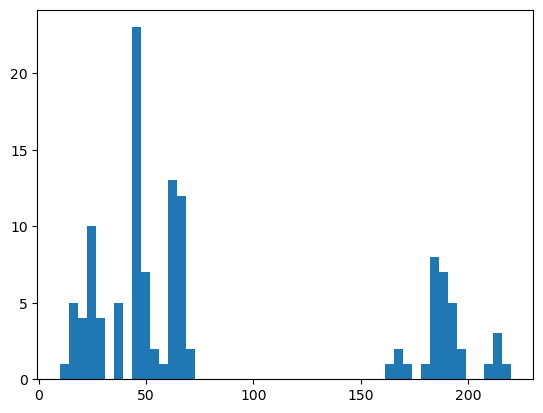

In [226]:
invdiffsp=60/diffsp
bins=plt.hist(invdiffsp,bins=50,range=[10,220])
min=bins[1][np.argmax(bins[0])]
max=bins[1][np.argmax(bins[0])+1]
print (bins)
print("Bpm",np.mean(invdiffsp[(invdiffsp>min) & (invdiffsp<max)])*2)
np.std(invdiffsp[(invdiffsp>min) & (invdiffsp<max)])*2

In [213]:
from scipy.io.wavfile import write
write("ilovernr-low.wav", SAMPLING_FREQUENCY, filtered.astype(np.int16))

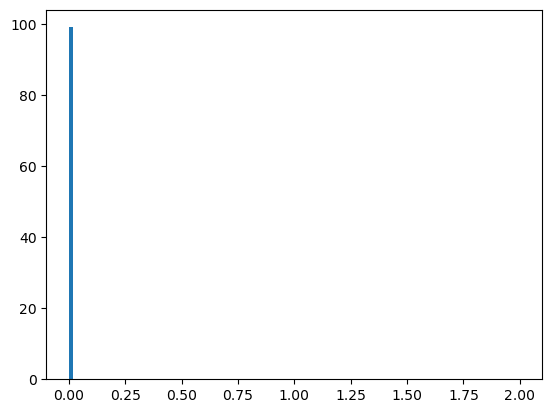

{'whiskers': [<matplotlib.lines.Line2D at 0x7f50563f91d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f50563fa450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5042edda10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f504d748a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f504d74b350>],
 'means': []}

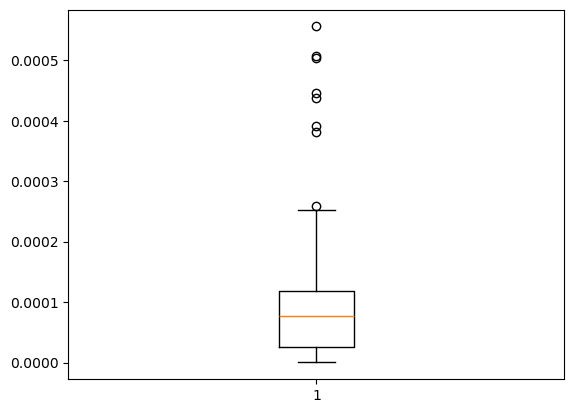

In [88]:
intervaleentrebeat=diffsp/SAMPLING_FREQUENCY
#bpm=60/intervaleentrebeat
hist=np.histogram(intervaleentrebeat,bins=100,range=(0,2))
plt.hist(hist[0],hist[1])
plt.show()
plt.boxplot(intervaleentrebeat)